In [74]:
import h5py
import numpy as np
import random
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [75]:
import h5py

    
with h5py.File('PU_1_sample.mat', 'r') as f:
    S1 = f["PU_1_sample"][:]
with h5py.File('PU_3_sample.mat', 'r') as f:
    S2 = f["PU_3_sample"][:]

In [76]:
S1=S1.T

S2=S2.T
print(S1)
print(S1.shape)

[[ 0.15869141  0.06408691 -0.08239746 ... -0.85754394  0.0213623
  -0.06713867]
 [-0.95214844  0.11901855  0.2746582  ...  0.21362305 -0.26245117
   0.30517578]
 [-0.45776367 -0.73242187 -0.29907227 ...  0.03662109 -0.01220703
  -0.0579834 ]
 ...
 [ 0.54931641  0.35095215  0.16174316 ...  0.20446777 -0.11901855
  -0.33569336]
 [ 0.11291504  0.01831055  0.03967285 ...  0.12207031  0.15563965
   0.14038086]
 [ 0.03356934  0.0579834   0.06103516 ... -0.37231445 -0.97045898
  -0.3326416 ]]
(5000, 4096)


In [77]:
num0=np.zeros(200)
label0=np.expand_dims(num0, axis=1)
num=np.ones(200)
label1=np.expand_dims(num, axis=1)
label2=label1*2
label3=label1*3
label4=label1*4
label5=label1*5
label6=label1*6
label7=label1*7

train_label=np.concatenate((label0, label1, label2, label3, label4, label5, label6, label7))

print(train_label.shape)

(1600, 1)


In [78]:

S1_0 = S1[0:200,:]
S1_1 = S1[500:700,:]
S1_2 = S1[1000:1200,:]
S1_3 = S1[1500:1700,:]
S1_4 = S1[2000:2200,:]
S1_5 = S1[2500:2700,:]
S1_6 = S1[3000:3200,:]
S1_7 = S1[3500:3700,:]
S1_8 = S1[4000:4200,:]
S1_9 = S1[4500:4700,:]

source_train = np.concatenate([S1_0, S1_1, S1_2, S1_3,  S1_5,  S1_7, S1_8, S1_9],axis=0)

print(source_train.shape)

(1600, 4096)


In [79]:

S2_0 = S2[0:200,:]
S2_1 = S2[500:700,:]
S2_2 = S2[1000:1200,:]
S2_3 = S2[1500:1700,:]
S2_4 = S2[2000:2200,:]
S2_5 = S2[2500:2700,:]
S2_6 = S2[3000:3200,:]
S2_7 = S2[3500:3700,:]
S2_8 = S2[4000:4200,:]
S2_9 = S2[4500:4700,:]

In [80]:
target_train = np.concatenate([S2_0, S2_1, S2_2, S2_3,  S2_5,  S2_7, S2_8, S2_9],axis=0)  
print(target_train.shape)

(1600, 4096)


In [81]:
import random
index = [i for i in range(len(source_train))]
random.shuffle(index)
# random.seed(1)
source_train = source_train[index]
target_train = target_train[index]

train_label = train_label[index]

source_train= np.expand_dims(source_train, axis=1)
target_train= np.expand_dims(target_train, axis=1)


source_train_tensor = torch.Tensor(source_train)
target_train_tensor = torch.Tensor(target_train)


train_label_tensor = torch.LongTensor(train_label)
train_label_tensor = torch.squeeze(train_label_tensor)

In [82]:
#测试样本100个
testS1_0 = S1[350:450,:]
testS1_1 = S1[850:950,:]
testS1_2 = S1[1350:1450,:]
testS1_3 = S1[1850:1950,:]
testS1_4 = S1[2350:2450,:]
testS1_5 = S1[2850:2950,:]
testS1_6 = S1[3350:3450,:]
testS1_7 = S1[3850:3950,:]
testS1_8 = S1[4350:4450,:]
testS1_9 = S1[4850:4950,:]


source_test = np.concatenate([testS1_0, testS1_1, testS1_2, testS1_3,  testS1_5, 
                          testS1_7, testS1_8, testS1_9],axis=0) 


print(source_test.shape)

(800, 4096)


In [83]:
#测试样本100个
testS2_0 = S2[350:450,:]
testS2_1 = S2[850:950,:]
testS2_2 = S2[1350:1450,:]
testS2_3 = S2[1850:1950,:]
testS2_4 = S2[2350:2450,:]
testS2_5 = S2[2850:2950,:]
testS2_6 = S2[3350:3450,:]
testS2_7 = S2[3850:3950,:]
testS2_8 = S2[4350:4450,:]
testS2_9 = S2[4850:4950,:]

target_test = np.concatenate([testS2_0, testS2_1, testS2_2, testS2_3,  testS2_5,  
                          testS2_7, testS2_8, testS2_9],axis=0) 
print(target_test.shape)

(800, 4096)


In [84]:
num0=np.zeros(100)
label0=np.expand_dims(num0, axis=1)
num=np.ones(100)
label1=np.expand_dims(num, axis=1)
label2=label1*2
label3=label1*3
label4=label1*4
label5=label1*5
label6=label1*6
label7=label1*7

test_label=np.concatenate((label0, label1, label2, label3, label4, label5, label6, label7, ))  
print(test_label.shape)

(800, 1)


In [85]:
index = [i for i in range(len(source_test))]
random.shuffle(index)
# random.seed(1)
source_test = source_test[index]
target_test = target_test[index]

test_label = test_label[index]

source_test= np.expand_dims(source_test, axis=1)
target_test= np.expand_dims(target_test, axis=1)


source_test_tensor = torch.Tensor(source_test)
target_test_tensor = torch.Tensor(target_test)


test_label_tensor = torch.LongTensor(test_label)
test_label_tensor = torch.squeeze(test_label_tensor)

In [86]:
import torch
from torch.utils.data import TensorDataset, DataLoader
####源域训练集
source_train_ds = TensorDataset(source_train_tensor, train_label_tensor)

bs=64
source_train_dataloader=DataLoader(source_train_ds, batch_size=bs, shuffle=True)

In [87]:
######源域测试集
source_test_ds = TensorDataset(source_test_tensor, test_label_tensor)
source_test_dataloader=DataLoader(source_test_ds, batch_size=bs, shuffle=True)

In [88]:
########目标域训练集
target_train_ds = TensorDataset(target_train_tensor, train_label_tensor)

target_train_dataloader=DataLoader(target_train_ds, batch_size=bs, shuffle=True)

In [89]:
######目标域测试集
target_test_ds = TensorDataset(target_test_tensor, test_label_tensor)
target_test_dataloader=DataLoader(target_test_ds, batch_size=bs, shuffle=True)

In [90]:
class SpatialAttention1(nn.Module):
    def __init__(self):
        super(SpatialAttention1, self).__init__()
        self.conv = nn.Conv1d(2, 1, kernel_size=7, padding=3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        max_pool = torch.max(x, dim=1, keepdim=True)[0]
#         print('max_pool',max_pool.shape)
        avg_pool = torch.mean(x, dim=1, keepdim=True)
#         print('avg_pool',avg_pool.shape)
        y = torch.cat([max_pool, avg_pool], dim=1)
        
        y = self.conv(y)
#         print('y',y.shape)
        return self.sigmoid(y)


class ChannelAttention1(nn.Module):
    def __init__(self, channel, reduction):
        super(ChannelAttention1, self).__init__()

        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(channel, channel // reduction)
    
        self.fc2 = nn.Linear(channel // reduction, channel)
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, x):
        b, c, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc1(y)
        y = F.relu(y)
        y = self.fc2(y)
        y = self.sigmoid(y).view(b, c, 1)
        return y

class ChannelSpatialAttention1(nn.Module):
    def __init__(self, channel, reduction):
        super(ChannelSpatialAttention1, self).__init__()

        self.CA1 = ChannelAttention1(channel, reduction)
        self.SA1 = SpatialAttention1()
        
        self.CA2 = ChannelAttention1(channel, reduction)
        self.SA2 = SpatialAttention1()
    

        

    def forward(self, x1, x2):
        y1_CA = self.CA1(x1)
        y1_SA = self.SA1(x1)
        y2_CA = self.CA2(x2)
        y2_SA = self.SA2(x2)
        return x2*y1_CA + x2*y1_SA + x1*y2_CA + x1*y2_SA

In [91]:
class MultiScaleFusion2(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(MultiScaleFusion2, self).__init__()

        
        self.C1 = nn.Conv1d(in_channel, out_channel, kernel_size=3, stride=2, padding = 1) #, 
        self.BN1 = nn.BatchNorm1d(out_channel)
        self.MaxPool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.query = nn.Conv1d(out_channel, out_channel, kernel_size=1, stride=1, padding = 0) 
        self.BN4 = nn.BatchNorm1d(out_channel)
        
        self.C2 = nn.Conv1d(in_channel, out_channel, kernel_size=5, stride=2, padding = 2)
        self.BN2 = nn.BatchNorm1d(out_channel)
        self.MaxPool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.key = nn.Conv1d(out_channel, out_channel, kernel_size=1, stride=1, padding = 0) #, 
        self.BN5 = nn.BatchNorm1d(out_channel)
        
        self.C3 = nn.Conv1d(in_channel, out_channel, kernel_size=7, stride=2, padding = 3)#, 
        self.BN3 = nn.BatchNorm1d(out_channel)
        self.MaxPool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.value = nn.Conv1d(out_channel, out_channel, kernel_size=1, stride=1, padding = 0)#,
        self.BN6 = nn.BatchNorm1d(out_channel)
        


    def forward(self, x1, x2, x3):
        y1 = self.C1(x1)
#         y1 = self.BN1(y1)
        y1 = F.relu(y1)
        y1 = self.MaxPool1(y1)
        
        q = self.query(y1)
#         q = self.BN4(q)
#         q = self.PReLU1(q)
        q = F.relu(q)
        
        y2 = self.C2(x2)
#         y2 = self.BN2(y2)
        y2 = F.relu(y2)
        y2 = self.MaxPool2(y2)
        
        k = self.key(y2)
#         k = self.BN5(k)
#         k = self.PReLU2(k)
        k = F.relu(k)
        
        y3 = self.C3(x3)
#         y3 = self.BN3(y3)
        y3 = F.relu(y3)
        y3 = self.MaxPool3(y3)
        
        v = self.value(y3)
#         v = self.BN6(v)
#         v = self.PReLU3(v)
        v = F.relu(v)
#         q1 = F.relu(q1)
#         print('q',q.shape)


        attn_weights = torch.matmul(q, k.transpose(1, 2))
        attn_weights1 = nn.functional.softmax(attn_weights, dim=-1)
        attended_values = torch.matmul(attn_weights1, v)

        out = attended_values + v
        return out

In [92]:
# 梯度反转层定义
from torch.autograd import Function
 
class GradientReversalLayer(Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x

    @staticmethod
    def backward(ctx, grad_output):
        return -grad_output

In [93]:
#-------------------------------提出方法
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=64, stride=2, padding = 32)
        self.BN1 = nn.BatchNorm1d(32)
        self.MaxPool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=2, padding = 1)
        self.BN2 = nn.BatchNorm1d(64)
        self.MaxPool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        
        self.conv2_1 = nn.Conv1d(32, 64, kernel_size=5, stride=2, padding = 2)
        self.BN2_1 = nn.BatchNorm1d(64)
        self.MaxPool2_1 = nn.MaxPool1d(kernel_size=2, stride=2)
        
        
        self.CSA1 = ChannelSpatialAttention1(channel =64, reduction = 4)
        
        self.BN3 = nn.BatchNorm1d(64)
        
        self.MSF2 = MultiScaleFusion2(in_channel = 64, out_channel = 128)
        self.BN4 = nn.BatchNorm1d(128)
        self.global_avg_pool0 = nn.AdaptiveAvgPool1d(1)
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)


    def forward(self, x):
        x = self.conv1(x)
#         x = self.BN1(x)
#         print(x.shape)
        x = F.relu(x)
        x = self.MaxPool1(x)
        y1 = self.conv2(x)
#         y1 = self.BN2(y1)
        y1 = F.relu(y1)
        y1 = self.MaxPool2(y1)
        
        y2 = self.conv2_1(x)
#         y2 = self.BN2_1(y2)
        y2 = F.relu(y2)
        y2 = self.MaxPool2_1(y2)
        y3 = self.CSA1(y1, y2)
#         y3 = self.BN3(y3)
        y3 = F.relu(y3)

        b, c, _ = y3.size()
        x0 = self.global_avg_pool(y3).view(b, c)
        

        Y = self.MSF2(y1, y2, y3)
        Y = self.BN4(Y)
        Y = F.relu(Y)

        b, c, _ = Y.size()

        out = self.global_avg_pool(Y).view(b, c)

        
        return x0, out

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()

        self.fc1 = nn.Linear(128, 8)


    def forward(self, x):

        x = self.fc1(x)
        x = F.log_softmax(x, dim=1)
        return x

class DomainClassifier(nn.Module):
    def __init__(self):
        super(DomainClassifier, self).__init__()

        self.fc1 = nn.Linear(128, 1)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = GradientReversalLayer.apply(x)#--------------梯度反转

        x = self.fc1(x)

        x = self.sigmoid(x)
        return x

class TransferLearningModel(nn.Module):
    def __init__(self):
        super(TransferLearningModel, self).__init__()
        self.feature_extractor = FeatureExtractor()
        self.classifier = Classifier()
        self.domain_classifier = DomainClassifier()

    def forward(self, x1, x2):
        GAP1, features1 = self.feature_extractor(x1)
        GAP2, features2 = self.feature_extractor(x2)
        class_outputs1 = self.classifier(features1)
        class_outputs2 = self.classifier(features2)
        domain_outputs1 = self.domain_classifier(features1)
        domain_outputs2 = self.domain_classifier(features2)
        return class_outputs1, class_outputs2, domain_outputs1, domain_outputs2, GAP1, GAP2

In [94]:
#定义MMD损失
class MMDLoss(nn.Module):
    def __init__(self, kernel_type='rbf', kernel_mul=2.0, kernel_num=5, fix_sigma=None, **kwargs):
        super(MMDLoss, self).__init__()
        self.kernel_num = kernel_num
        self.kernel_mul = kernel_mul
        self.fix_sigma = None
        self.kernel_type = kernel_type

    def guassian_kernel(self, source, target, kernel_mul, kernel_num, fix_sigma):
        n_samples = int(source.size()[0]) + int(target.size()[0])
        total = torch.cat([source, target], dim=0)
        total0 = total.unsqueeze(0).expand(
            int(total.size(0)), int(total.size(0)), int(total.size(1)))
        total1 = total.unsqueeze(1).expand(
            int(total.size(0)), int(total.size(0)), int(total.size(1)))
        L2_distance = ((total0-total1)**2).sum(2)
        if fix_sigma:
            bandwidth = fix_sigma
        else:
            bandwidth = torch.sum(L2_distance.data) / (n_samples**2-n_samples)
        bandwidth /= kernel_mul ** (kernel_num // 2)
        bandwidth_list = [bandwidth * (kernel_mul**i)
                          for i in range(kernel_num)]
        kernel_val = [torch.exp(-L2_distance / bandwidth_temp)
                      for bandwidth_temp in bandwidth_list]
        return sum(kernel_val)

    def linear_mmd2(self, f_of_X, f_of_Y):
        loss = 0.0
        delta = f_of_X.float().mean(0) - f_of_Y.float().mean(0)
        loss = delta.dot(delta.T)
        return loss

    def forward(self, source, target):
        if self.kernel_type == 'linear':
            return self.linear_mmd2(source, target)
        elif self.kernel_type == 'rbf':
            batch_size = int(source.size()[0])
            kernels = self.guassian_kernel(
                source, target, kernel_mul=self.kernel_mul, kernel_num=self.kernel_num, fix_sigma=self.fix_sigma)
            XX = torch.mean(kernels[:batch_size, :batch_size])
            YY = torch.mean(kernels[batch_size:, batch_size:])
            XY = torch.mean(kernels[:batch_size, batch_size:])
            YX = torch.mean(kernels[batch_size:, :batch_size])
            loss = torch.mean(XX + YY - XY - YX)
            return loss

In [95]:
# 定义判别损失
class DiscriminationLoss(nn.Module):
    def __init__(self):
        super(DiscriminationLoss, self).__init__()

    def forward(self, source_outputs, target_outputs):
        source_labels = torch.zeros(source_outputs.size(0), dtype=torch.long)
        target_labels = torch.ones(target_outputs.size(0), dtype=torch.long)


        loss_source = nn.BCELoss()(source_outputs, source_labels.float())
        loss_target = nn.BCELoss()(target_outputs, target_labels.float())

        total_loss = loss_source + loss_target
        return total_loss

In [96]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CosineSimilarityLoss(nn.Module):
    def __init__(self):
        super(CosineSimilarityLoss, self).__init__()

    def forward(self, source_features, target_features):
  

        source_normalized = F.normalize(source_features, p=2, dim=1)  
        target_normalized = F.normalize(target_features, p=2, dim=1)  

        
        similarity = torch.mm(source_normalized, target_normalized.t())

        
        loss = 1 - similarity.mean()

        return loss


cosine_loss = CosineSimilarityLoss()

In [97]:
# 初始化模型和优化器
model = TransferLearningModel()
mmd_loss = MMDLoss()
discrimination_loss = DiscriminationLoss()
domain_criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [98]:
# 训练迁移学习模型
lambda_domain = 0.4  # 用于平衡域适应损失的权重
lambda_domain0 = 0.1
lambda_discrimination = 0.005

    
def train(model, source_train_dataloader, target_train_dataloader):
    model.train()
    total_samples = 0
    correct = 0
    total_loss = 0
    for (source_inputs, source_labels), (target_inputs, target_labels) in zip(source_train_dataloader, target_train_dataloader):
#         print (source_inputs.shape)
        # 清空梯度
        optimizer.zero_grad()
        
        # 模型前向传播
        source_outputs,target_outputs , source_domain_outputs, target_domain_outputs, GAP1, GAP2  = model(source_inputs, target_inputs)
   
        
        # 计算源域任务损失
        loss_source = nn.CrossEntropyLoss()(source_outputs, source_labels)
        


        #计算判别损失   
        loss_discrimination = lambda_discrimination * discrimination_loss(source_domain_outputs.squeeze(), target_domain_outputs.squeeze())
        
        

        # MMD损失
        loss_domain = lambda_domain * mmd_loss(source_outputs, target_outputs)
        
        loss_domain0 = lambda_domain0 *cosine_loss(GAP1, GAP2)

        # 总损失为三个损失的加权和
        total_loss = loss_source  + loss_discrimination+ loss_domain +  loss_domain0

        # 反向传播和优化
        total_loss.backward()
        optimizer.step()
#         print(total_loss)
#         print('loss_source',loss_source)
#         print('loss_discrimination',loss_discrimination)
#         print('loss_domain',loss_domain)
        
        total_samples += source_labels.size(0)
        total_loss += total_loss.item() * source_inputs.size(0)
#     print('size',source_inputs.size(0))
#     print('total_loss',total_loss)
        _, predicted = source_outputs.max(1)
        correct += predicted.eq(source_labels).sum().item()
        
        loss_source += loss_source.item() * source_inputs.size(0)
        loss_discrimination += loss_discrimination.item() * source_inputs.size(0)
        loss_domain += loss_domain.item() * source_inputs.size(0)
#     print('total_samples',total_samples)
    epoch_loss = total_loss / total_samples
    epoch_accuracy = correct / total_samples
    
    epoch_loss_source = loss_source / total_samples
    epoch_loss_discrimination = loss_discrimination / total_samples
    epoch_loss_domain = loss_domain / total_samples
#     print('epoch_loss',epoch_loss)
#     print('epoch_accuracy',epoch_accuracy)
    return epoch_loss, epoch_accuracy,epoch_loss_source, epoch_loss_discrimination, epoch_loss_domain




# 定义测试函数
def test(model, source_test_dataloader, target_test_dataloader):
    model.eval()
    total_loss = 0
    correct = 0
    total_samples = 0
#     best_epoch_accuracy = 0

    with torch.no_grad():
#         for target_inputs, target_labels in target_test_dataloader:
        for (source_inputs, source_labels), (target_inputs, target_labels) in zip(source_test_dataloader, target_test_dataloader):
    

            source_outputs, target_outputs, source_domain_outputs, target_domain_outputs, GAP1, GAP2 = model(source_inputs, target_inputs)
        #计算目标域任务损失
            loss_target = nn.CrossEntropyLoss()(target_outputs, target_labels)
            

            total_loss += loss_target.item() * target_inputs.size(0)
            _, predicted = target_outputs.max(1)
            correct += predicted.eq(target_labels).sum().item()
            total_samples += target_labels.size(0)
            
    return epoch_loss, epoch_accuracy

In [ ]:
num_epochs = 200
loss_train_history = []
acc_train_history = []
loss_test_history = []
acc_test_history = []
epoch_loss_source_history = []
epoch_loss_discrimination_history = []
epoch_loss_domain_history = []
best_test_accuracy = 0

for epoch in range(num_epochs):

    epoch_loss, epoch_accuracy,epoch_loss_source, epoch_loss_discrimination, epoch_loss_domain = train(model, source_train_dataloader, target_train_dataloader)
    
    loss_train_history.append(epoch_loss)
    acc_train_history.append(epoch_accuracy)
    epoch_loss_source_history.append(epoch_loss_source)
    epoch_loss_discrimination_history.append(epoch_loss_discrimination)
    epoch_loss_domain_history.append(epoch_loss_domain)

    # 测试模型 
    test_loss, test_accuracy = test(model, source_train_dataloader, target_test_dataloader)
#     if test_accuracy >= best_test_accuracy:
#         best_test_accuracy = test_accuracy
#         torch.save(model.state_dict(), 'best_model_50sample_2_3.pth')
    loss_test_history.append(test_loss)
    acc_test_history.append(test_accuracy)
#     print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {epoch_loss:.4f},Source Loss = {epoch_loss_source:.4f},Discrimination Loss = {epoch_loss_discrimination:.4f},MMD Loss = {epoch_loss_domain:.4f}, Train Accuracy = {epoch_accuracy:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")      
    print(f"Epoch {epoch+1}/{num_epochs}: Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")

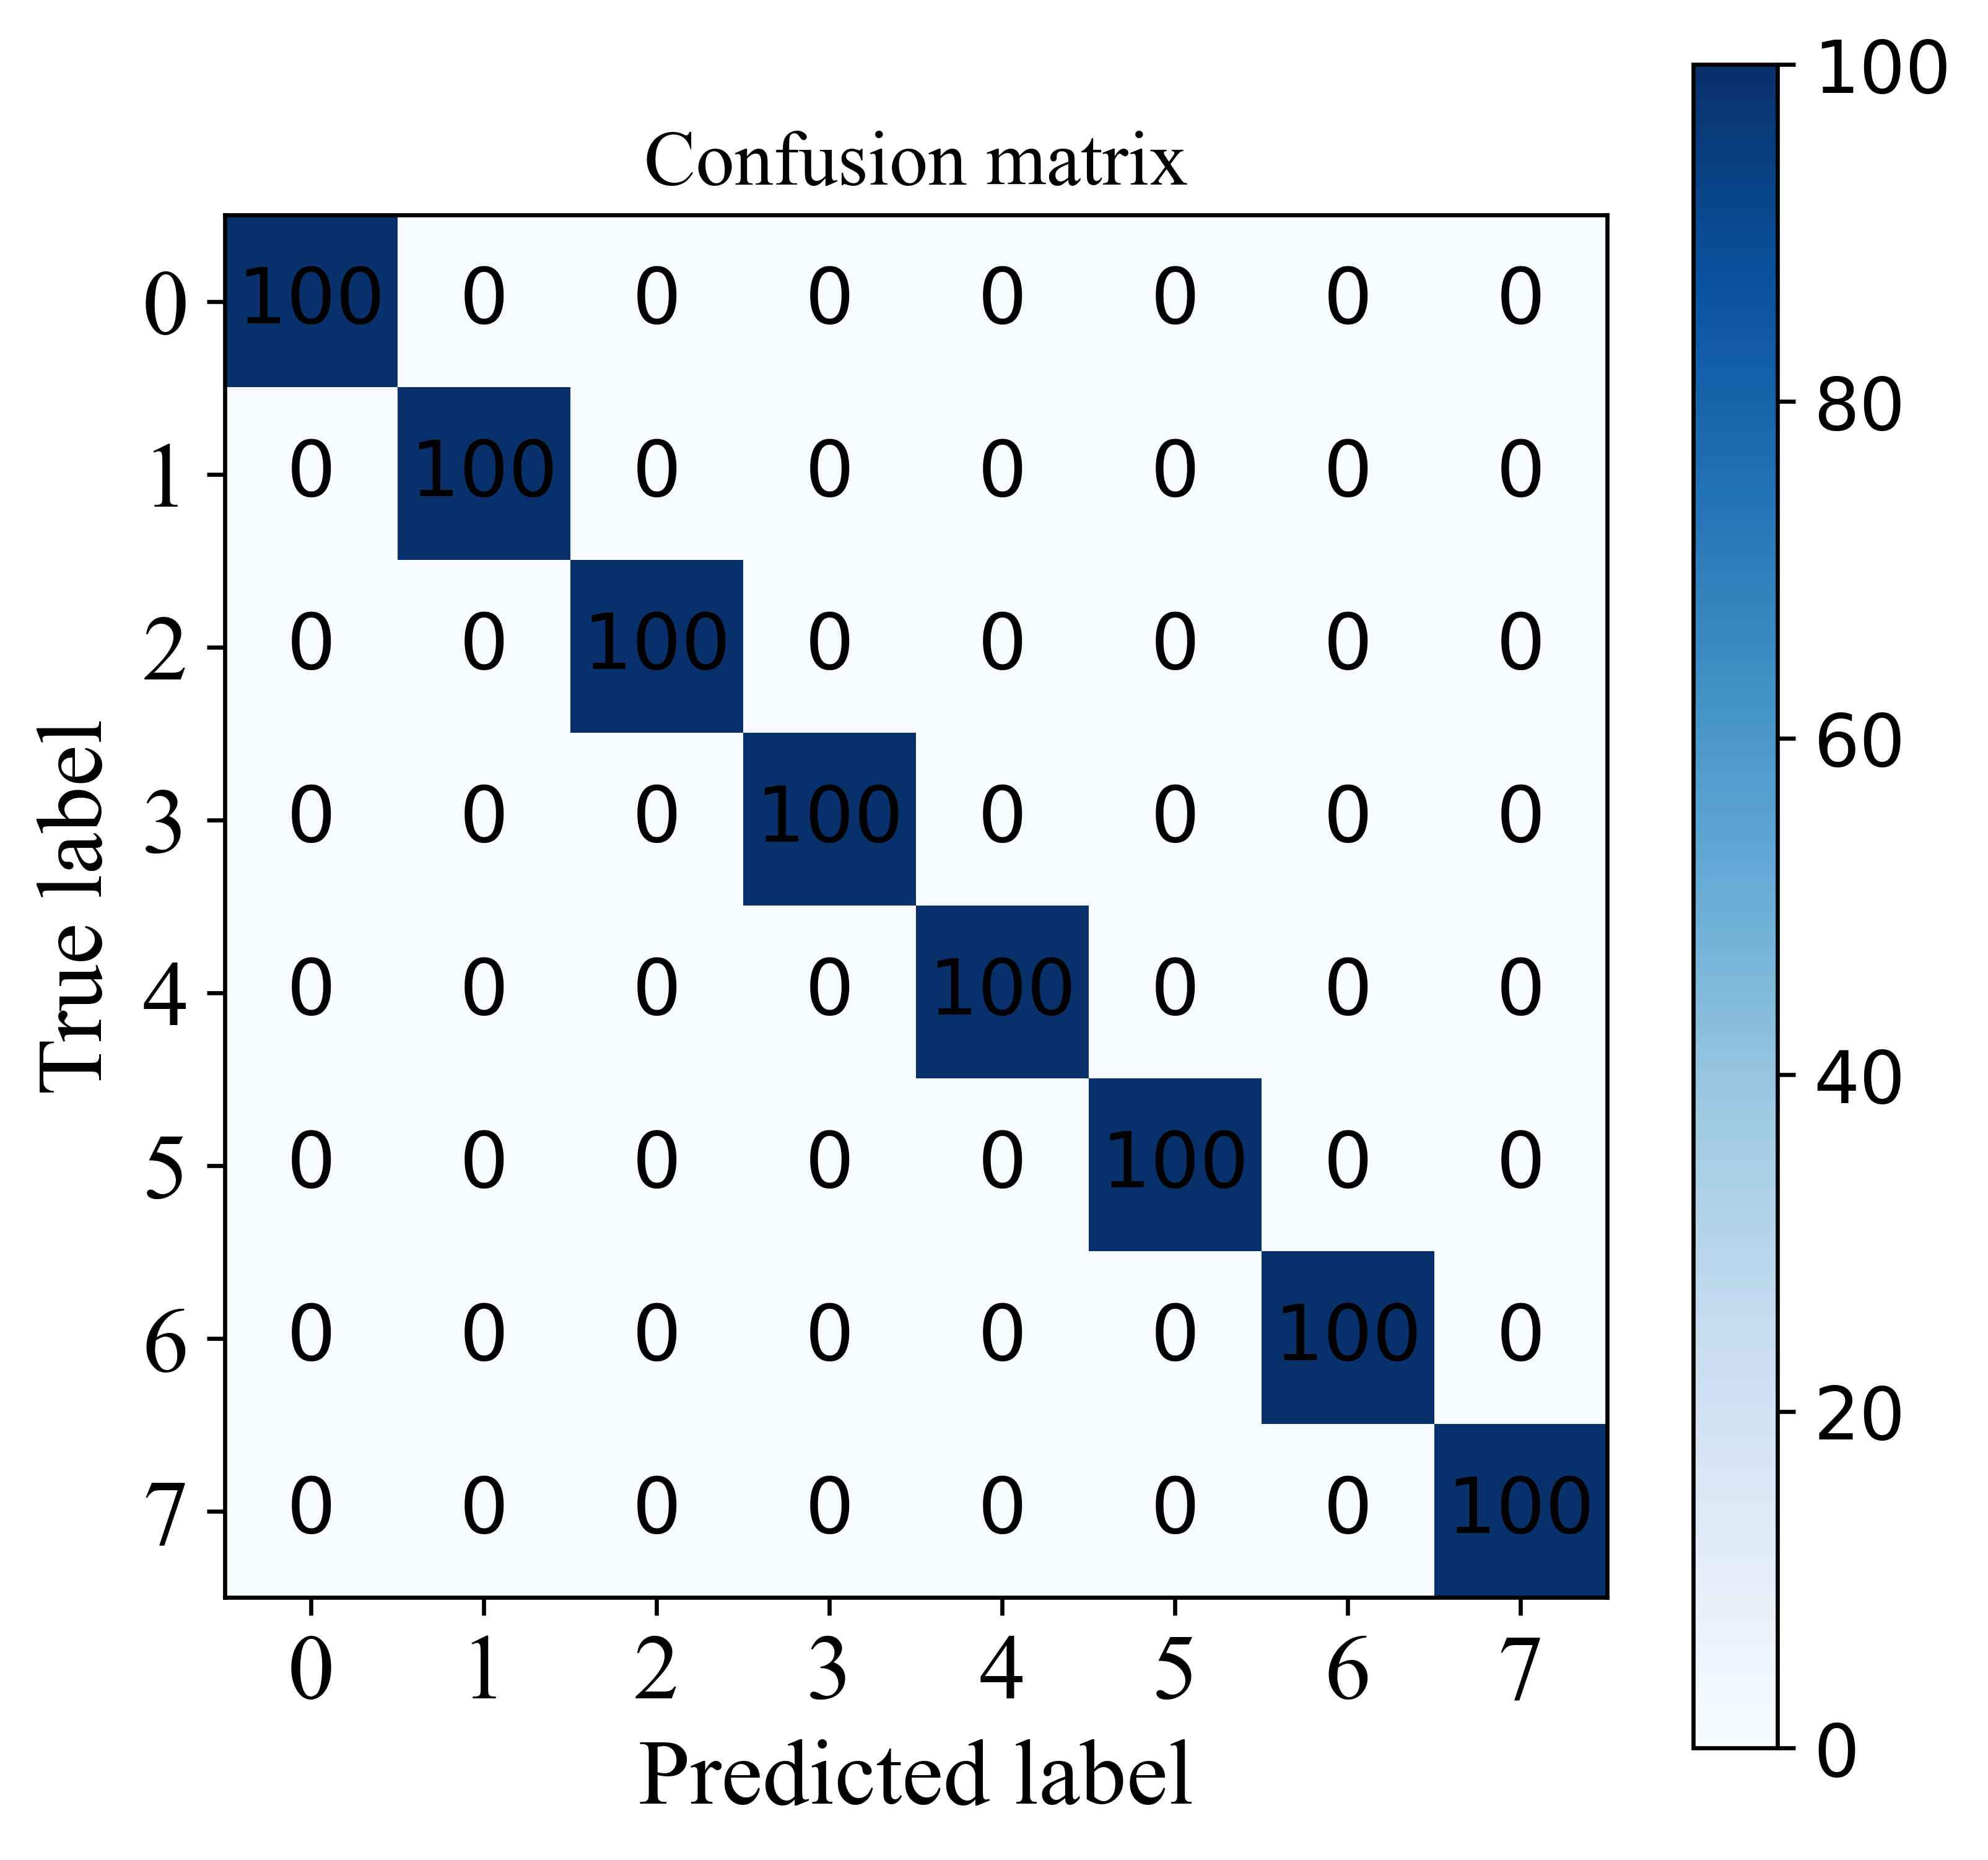

In [105]:
model.eval()  # 将模型设置为评估模式，关闭Dropout等
y_true = []
y_pred = []

with torch.no_grad():
#     for sensor1, labels in target2_test_dataloader:
#         outputs = model(sensor1)
    for (source_inputs, source_labels), (target_inputs, target_labels) in zip(source_test_dataloader, target_test_dataloader):
        source_outputs, target_outputs, source_domain_outputs, target_domain_outputs, GAP1, GAP2 = model(source_inputs, target_inputs)
        _, predicted = torch.max(target_outputs.data, 1)
        
#         print('source_inputs',source_inputs)
#         print('source_inputs',source_inputs.shape)
#         print('source_outputs',source_outputs)
#         print('source_outputs',source_outputs.shape)
        y_true.extend(target_labels.numpy())
        y_pred.extend(predicted.numpy())

from sklearn.metrics import confusion_matrix
def cm_plot(original_label, predict_label, pic=None):
    cm = confusion_matrix(original_label, predict_label)
    # fig, ax = plt.subplots(1,1)
    #     plt.figure(figsize=(7, 7))#混淆矩阵大小
    #     plt.matshow(cm, cmap=plt.cm.Wistia,fignum=0)#GnBu混淆矩阵颜色# Wistia
    #     plt.colorbar()

    fig, ax = plt.subplots(figsize=(6, 6),dpi=300)
    # 1.热度图，后面是指定的颜色块，cmap可设置其他的不同颜色
    im = ax.imshow(cm, cmap=plt.cm.Blues)
    cbar = ax.figure.colorbar(im, ax=ax)  # 右边的colorbar
    cbar.ax.tick_params(labelsize=14)
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[y, x], xy=(x, y), horizontalalignment='center', verticalalignment='center', fontsize=15)

    #     iters = np.reshape([[[i,j] for j in range(len(cm))] for i in range(len(cm))],(cm.size,2))
    #     for i, j in iters:
    #     plt.text(j, i, format(cm[i, j]),fontsize = 16,va = 'center', ha = 'center')   #显示对应的数字
    #     for i in range(len(cm)):    #第几行
    #         for j in range(len(cm[i])):    #第几列
    #             plt.text(j, i, format(cm[i][j]),
    #             fontsize=16,  # 矩阵字体大小
    #             horizontalalignment="center",  # 水平居中。
    #             verticalalignment="center") # 垂直居中。
    #             #color="white" if confusion[i, j] > thresh else "black")

    # classes=['N', 'ORF', 'IRF','BF','OIF','OBF','OIBF']#标签
#     classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']#
    classes = ['0', '1', '2', '3', '4', '5', '6', '7']#, '8', '9'
    tick_marks = np.arange(len(classes))
    # plt.xticks(tick_marks, classes,rotation=-45)#标签旋转45度
    plt.xticks(tick_marks, classes, fontsize=18, fontproperties="Times New Roman")  # 设置字体和字号大小
    # xticks.spines['bottom'].set_visible(False) # ax右轴隐藏
    plt.yticks(tick_marks, classes, fontsize=18, fontproperties="Times New Roman")
    plt.ylabel('True label', fontsize=18, fontproperties="Times New Roman")
    plt.xlabel('Predicted label', fontsize=18, fontproperties="Times New Roman")
    plt.title('Confusion matrix', fontsize=15, fontproperties="Times New Roman")
    if pic is not None:
        plt.savefig(str(pic) + '.jpg')
    plt.show()
cm_plot(y_true, y_pred)

d:\python3.7\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\python3.7\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


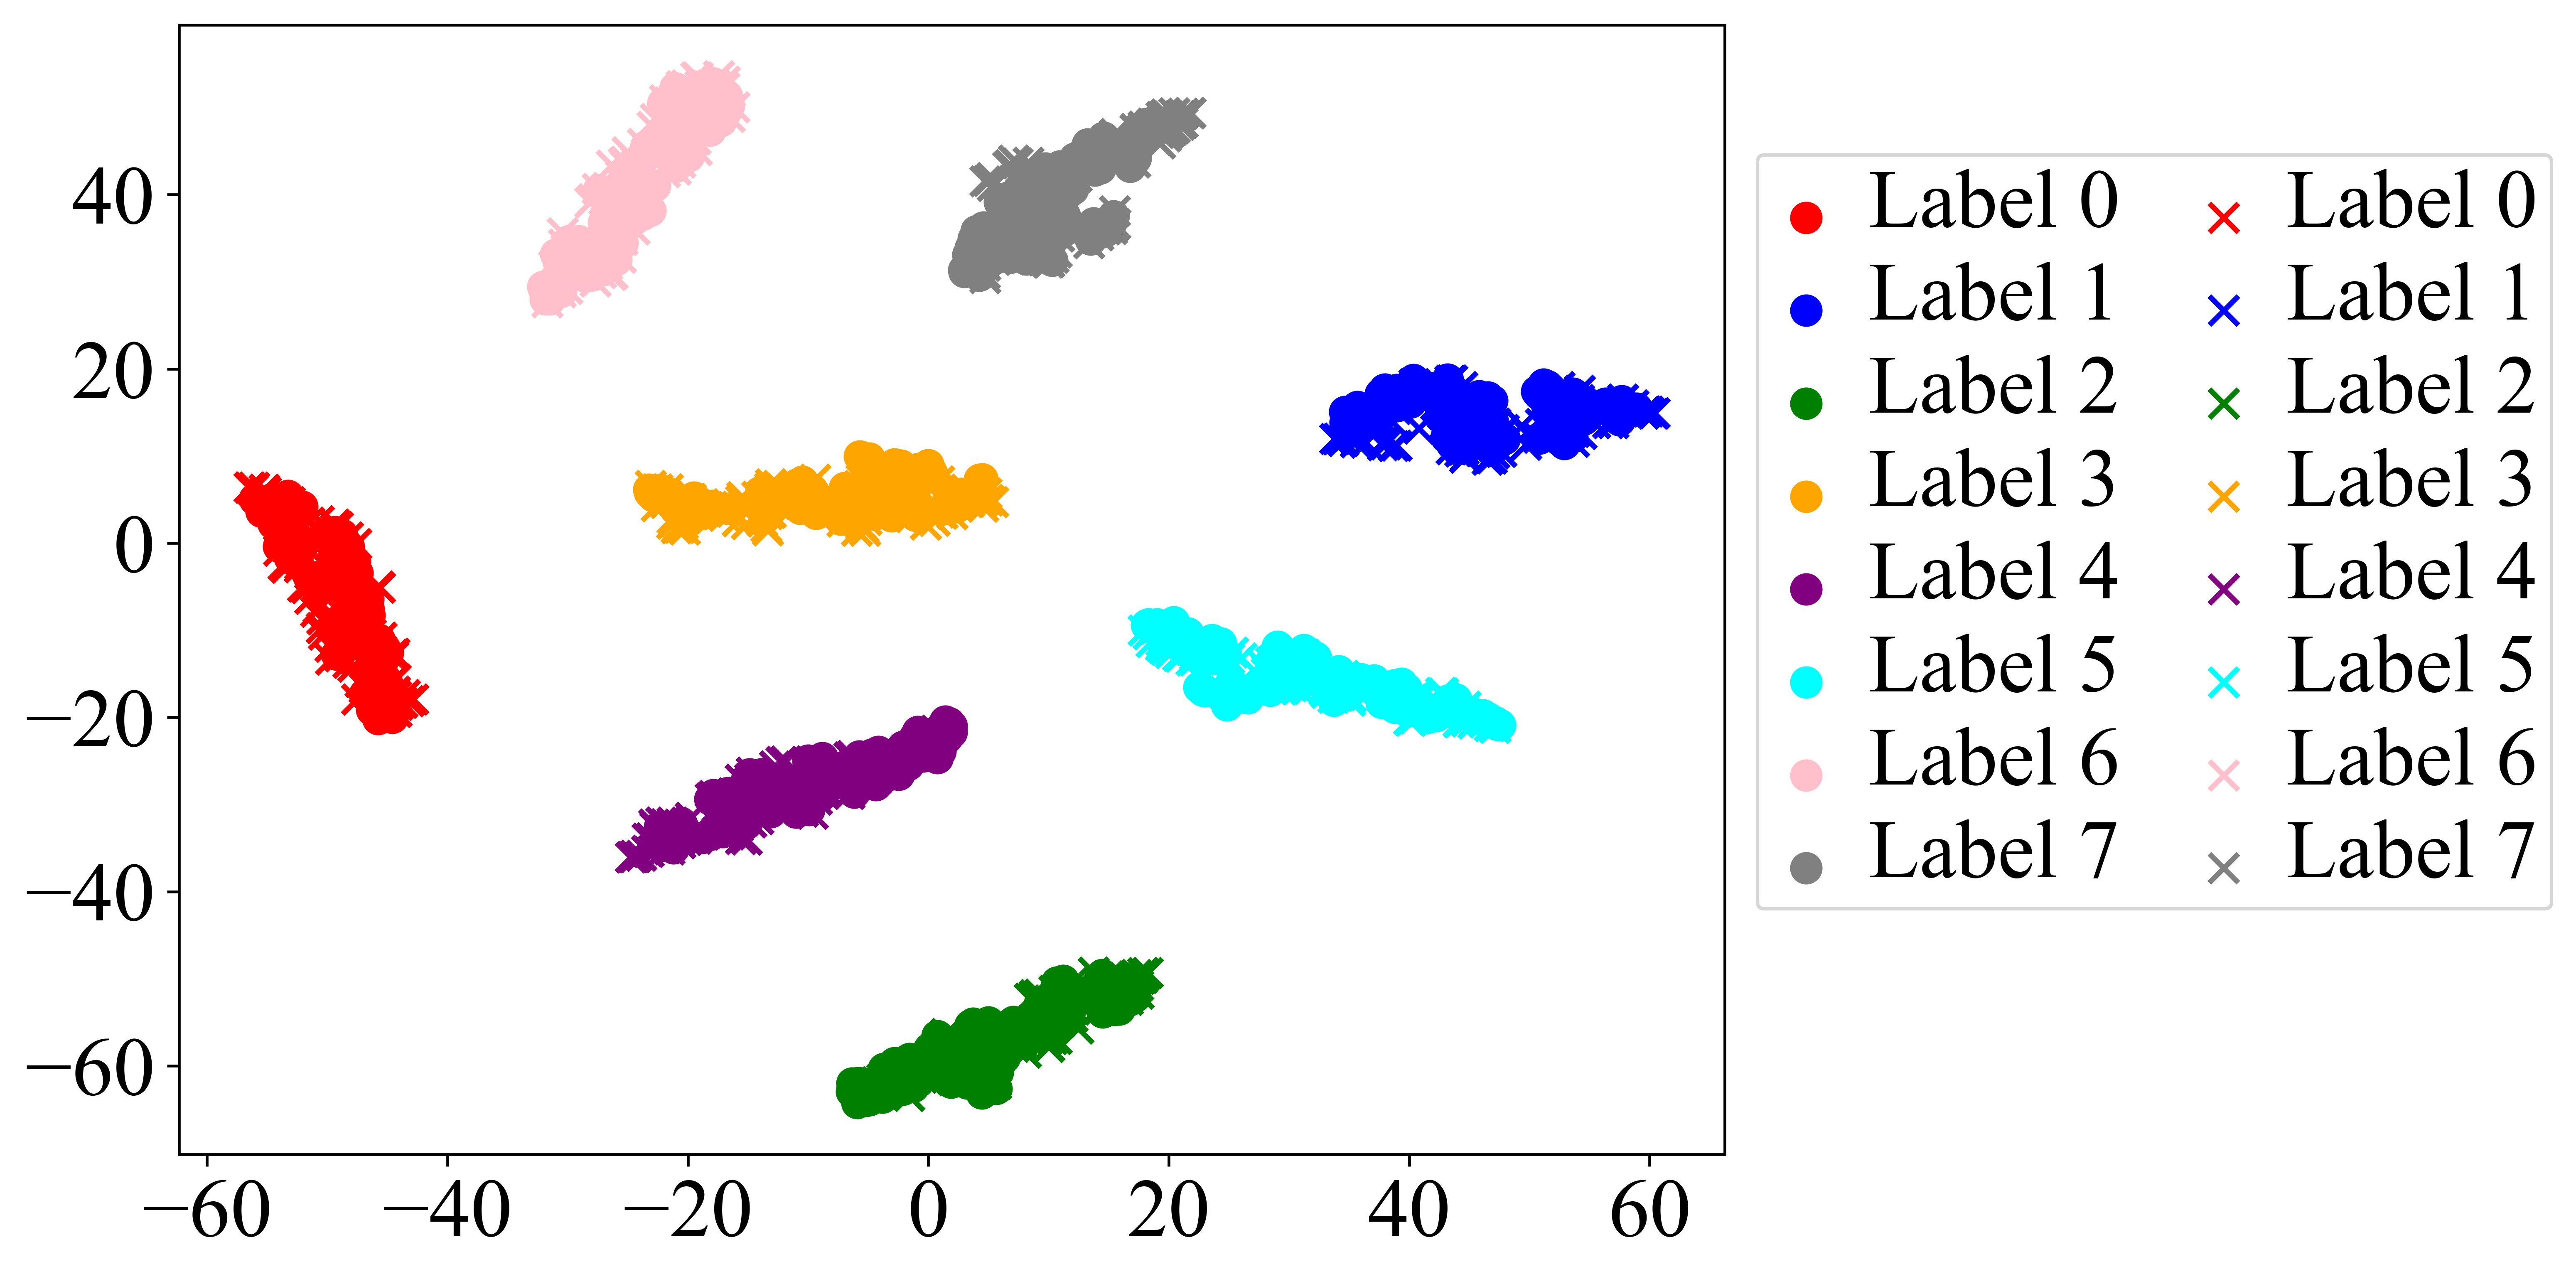

In [106]:
#-------------------------------------------------------源域和目标域测试集
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# 获取特征表示
model.eval()
source_features = []
source_labels1 = []

target_features = []
target_labels1 = [] 

with torch.no_grad():
    for (source_inputs, source_labels), (target_inputs, target_labels) in zip(source_test_dataloader, target_test_dataloader):
#     for (source_inputs, source_labels), (target_inputs, target_labels) in zip(source_train_dataloader, target_train_dataloader):
#     for source_inputs, source_labels in source_test_dataloader:

#         source_outputs, _ = model(source_inputs)
        source_outputs, target_outputs, source_domain_outputs, target_domain_outputs, GAP1, GAP2 = model(source_inputs, target_inputs)
        source_features.append(source_outputs)
        source_labels1.append(source_labels)
       
        
        

# model.eval()        
      
# with torch.no_grad():        
#     for target_inputs, target_labels in target_test_dataloader:
#         target_outputs, _ = model(target_inputs)
        target_features.append(target_outputs)
        target_labels1.append(target_labels)    
# 将特征数组连接成一个大的特征矩阵
Source_Features = np.concatenate(source_features, axis=0)
Source_Labels = np.concatenate(source_labels1, axis=0) 
Target_Features = np.concatenate(target_features, axis=0)
Target_Labels = np.concatenate(target_labels1, axis=0)

Features = np.concatenate([Source_Features, Target_Features],axis=0)
Labels = np.concatenate([Source_Labels, Target_Labels],axis=0)
# 使用t-SNE进行特征降维
tsne = TSNE(n_components=2, random_state=0)
z = tsne.fit_transform(Features)
z_source = z[0:800]
z_target = z[800:1600]
# z_source = z[0:400]
# z_target = z[400:800]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'pink', 'gray', 'brown', 'coral'] # 自定义每个类别的颜色
plt.figure(figsize=(8, 6), dpi=300)
# for label in np.unique(Labels):
#     plt.scatter(z[Labels == label, 0], z[Labels == label, 1], c=colors[label], s=70, label=f'Label {label}')

for label in np.unique(Source_Labels):
    plt.scatter(z_source[Source_Labels == label, 0], z_source[Source_Labels == label, 1], c=colors[label], s=70, label=f'Label {label}')

for label in np.unique(Target_Labels):
    plt.scatter(z_target[Target_Labels == label, 0], z_target[Target_Labels == label, 1], c=colors[label],marker= 'x', s=70, label=f'Label {label}')

# 设置刻度标签的字体大小和形式
plt.xticks(fontname='Times New Roman', fontsize=24)  # 设置X轴刻度标签的字体大小和形式
plt.yticks(fontname='Times New Roman', fontsize=24)  # 设置Y轴刻度标签的字体大小和形式
# plt.legend()
legend = plt.legend(bbox_to_anchor=(1.01, 0.9), ncol=2)  # bbox_to_anchor表示图例相对于图片的位置，ncol表示图例列数
# legend = plt.legend(bbox_to_anchor=(0.5, 0), ncol=6)
# # legend.legendHandles[0]._sizes = [30]  # 设置第一个标签的方框大小为30
# # legend.legendHandles[1]._sizes = [60]  # 设置第二个标签的方框大小为60

# # legend.get_frame().set_linewidth(1.5)  # 设置图例边框的宽度
plt.setp(legend.get_texts(), fontsize='24', fontproperties="Times New Roman")  # 设置图例中文本的字体大小
plt.show()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'